# mobile price-range prediction classification

In [40]:
# Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics


In [41]:
#load dataset
mobile_data = pd.read_csv('Documents/dataset/df/train.csv')

In [42]:
mobile_data.shape

(2000, 21)

In [43]:
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [44]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [45]:
mobile_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [46]:
# class distribution to check if each class has the same number of instances
print(mobile_data.groupby('price_range').size())

price_range
0    500
1    500
2    500
3    500
dtype: int64


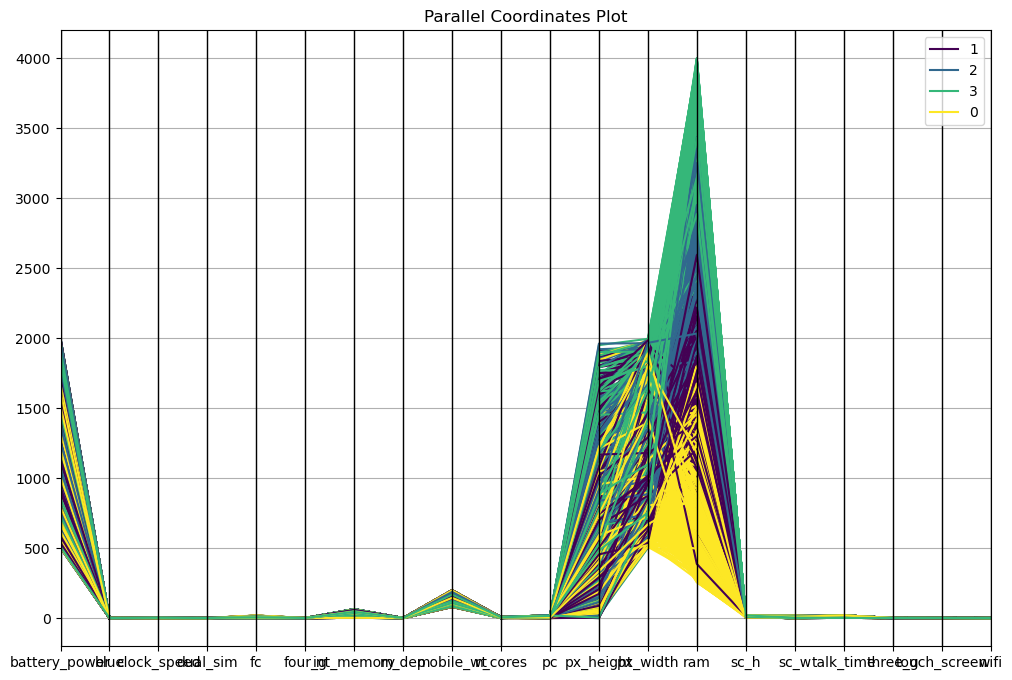

In [47]:
#data visualization to know the relationship btn features and target

from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12, 8))
parallel_coordinates(mobile_data, 'price_range', colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.show()



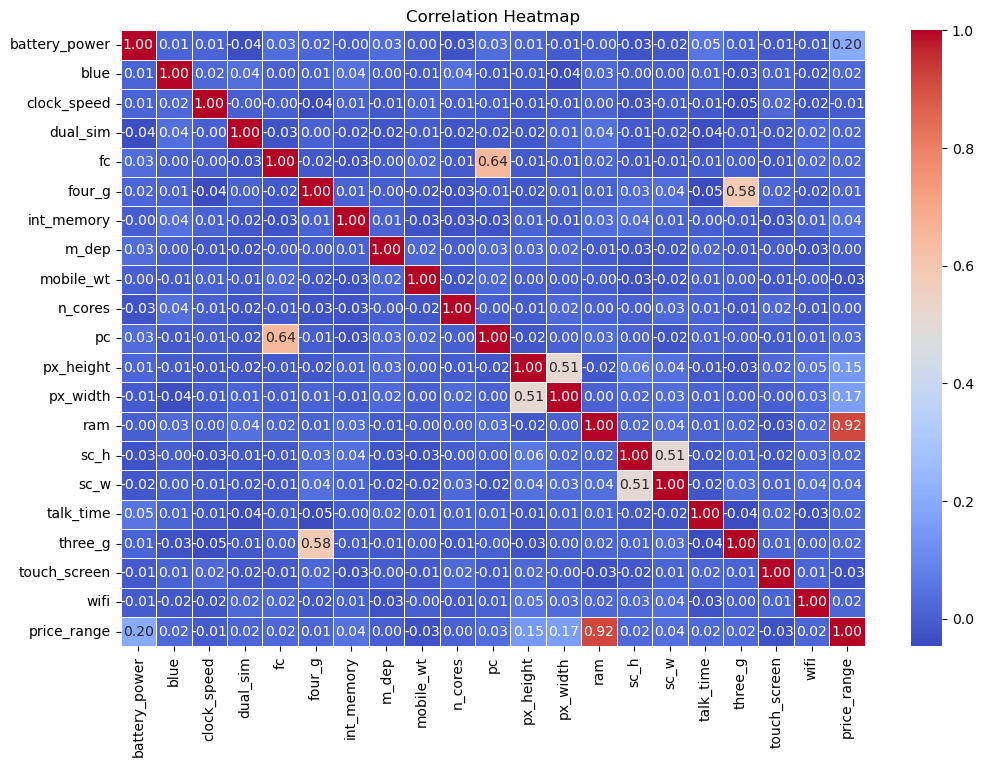

In [48]:
#correlation heatmap
import seaborn as sns
correlation_matrix = mobile_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

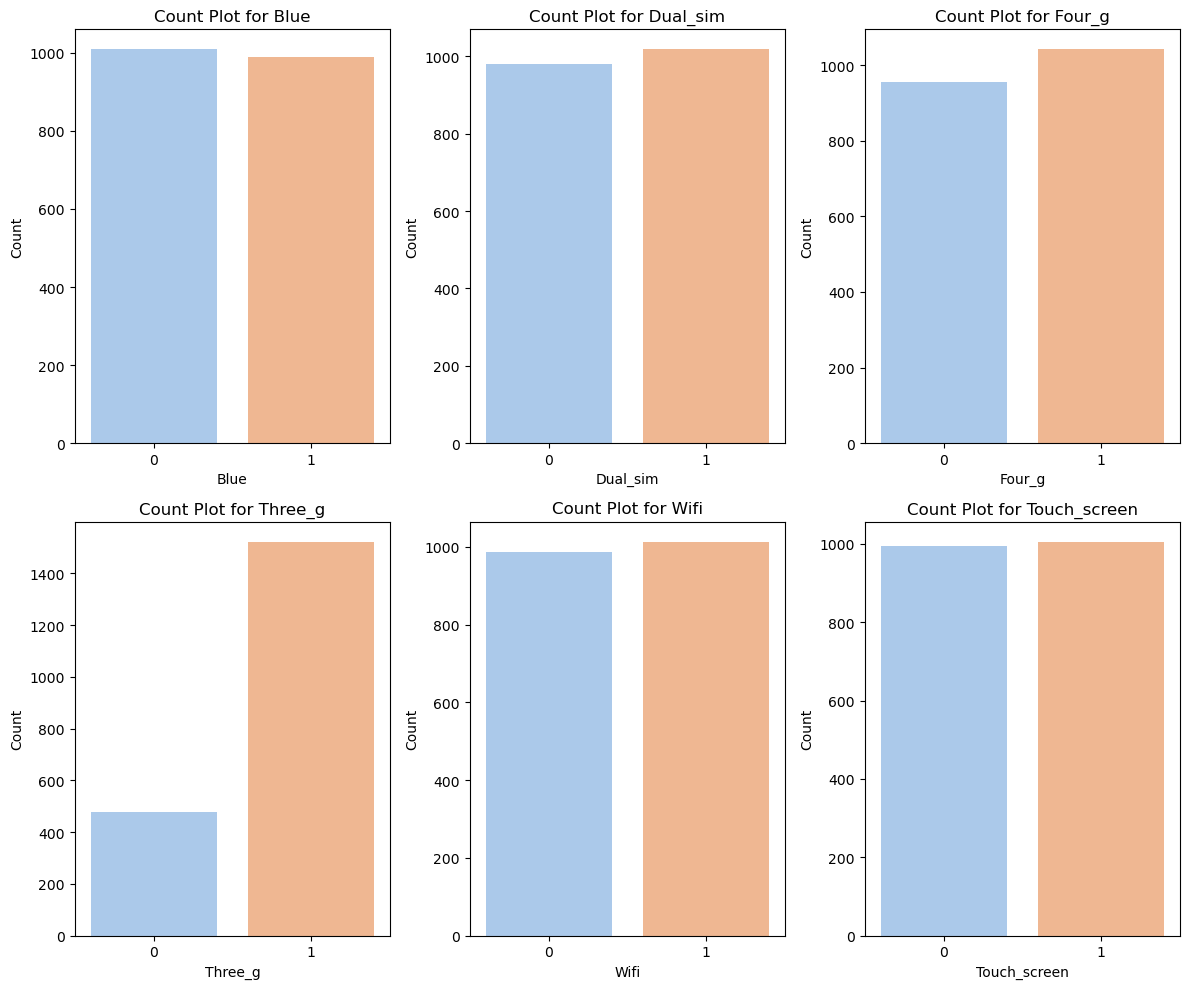

In [49]:
categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'wifi', 'touch_screen']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=mobile_data, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Count Plot for {feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

X = mobile_data.drop('price_range', axis=1) 
y = mobile_data['price_range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1600, 20)
X_test shape: (400, 20)
y_train shape: (1600,)
y_test shape: (400,)


In [51]:
model_pipeline = []
model_pipeline.append(LogisticRegression())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(SVC())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(GaussianNB())

## model evaluation

Model: Logistic Regression
Accuracy: 0.6325


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


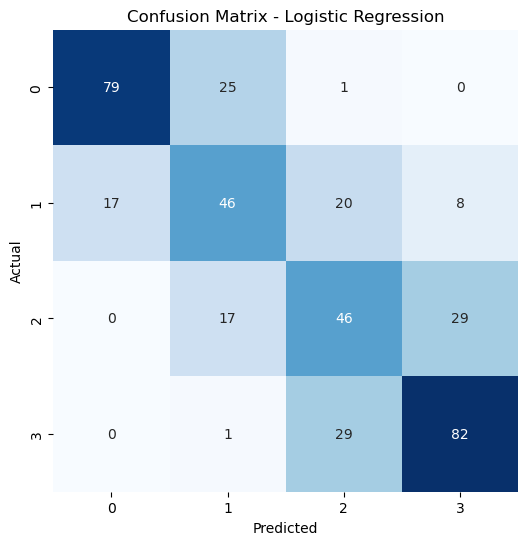

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.52      0.51      0.51        91
           2       0.48      0.50      0.49        92
           3       0.69      0.73      0.71       112

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.64      0.63      0.63       400

Model: SVM
Accuracy: 0.8950


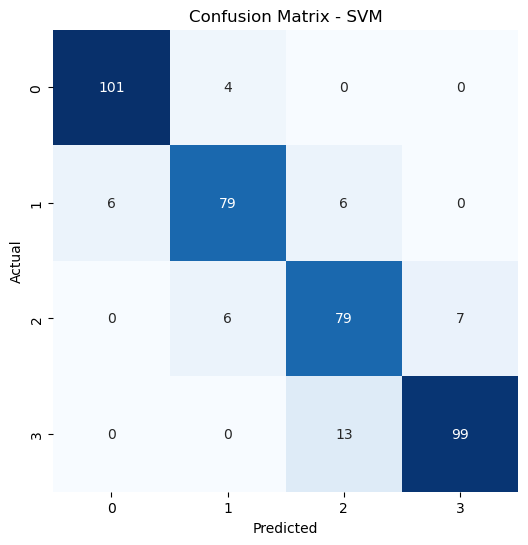

Classification Report - SVM
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.89      0.87      0.88        91
           2       0.81      0.86      0.83        92
           3       0.93      0.88      0.91       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400

Model: Decision Tree
Accuracy: 0.9650


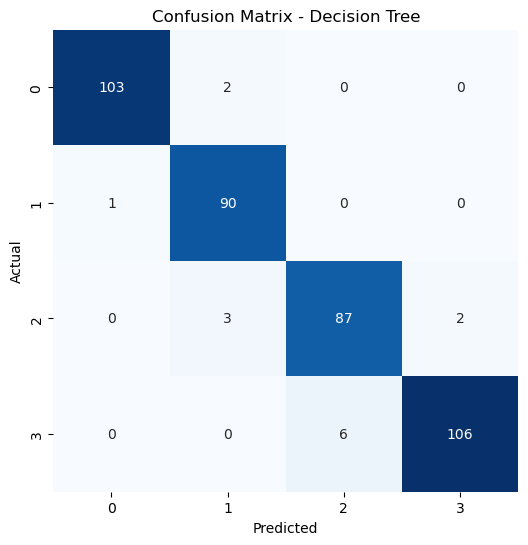

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.95      0.99      0.97        91
           2       0.94      0.95      0.94        92
           3       0.98      0.95      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400

Model: Random Forest
Accuracy: 0.8350


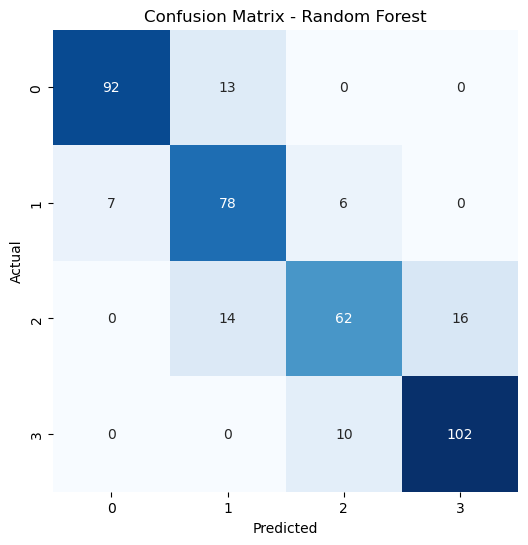

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       105
           1       0.74      0.86      0.80        91
           2       0.79      0.67      0.73        92
           3       0.86      0.91      0.89       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400

Model: Naive Bayes
Accuracy: 0.7975


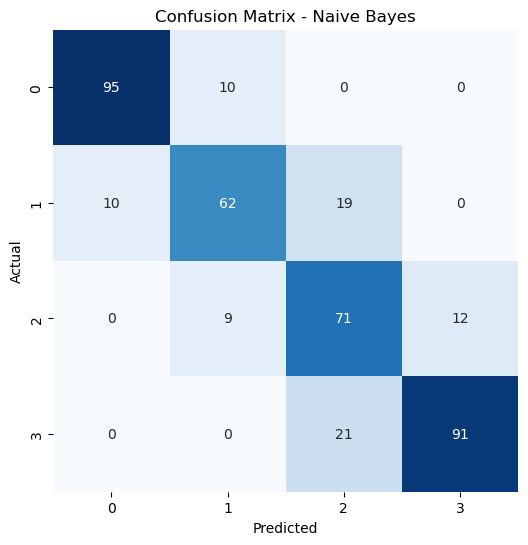

Classification Report - Naive Bayes
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       105
           1       0.77      0.68      0.72        91
           2       0.64      0.77      0.70        92
           3       0.88      0.81      0.85       112

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.81      0.80      0.80       400



In [52]:

model_list = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list = []

for idx, model in enumerate(model_pipeline):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)

    # Display metrics
    print(f"Model: {model_list[idx]}")
    print(f"Accuracy: {accuracy:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix - {model_list[idx]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print(f"Classification Report - {model_list[idx]}")
    print(classification_report(y_test, y_pred))
    


## the graph shows different type of model and their perfomance

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


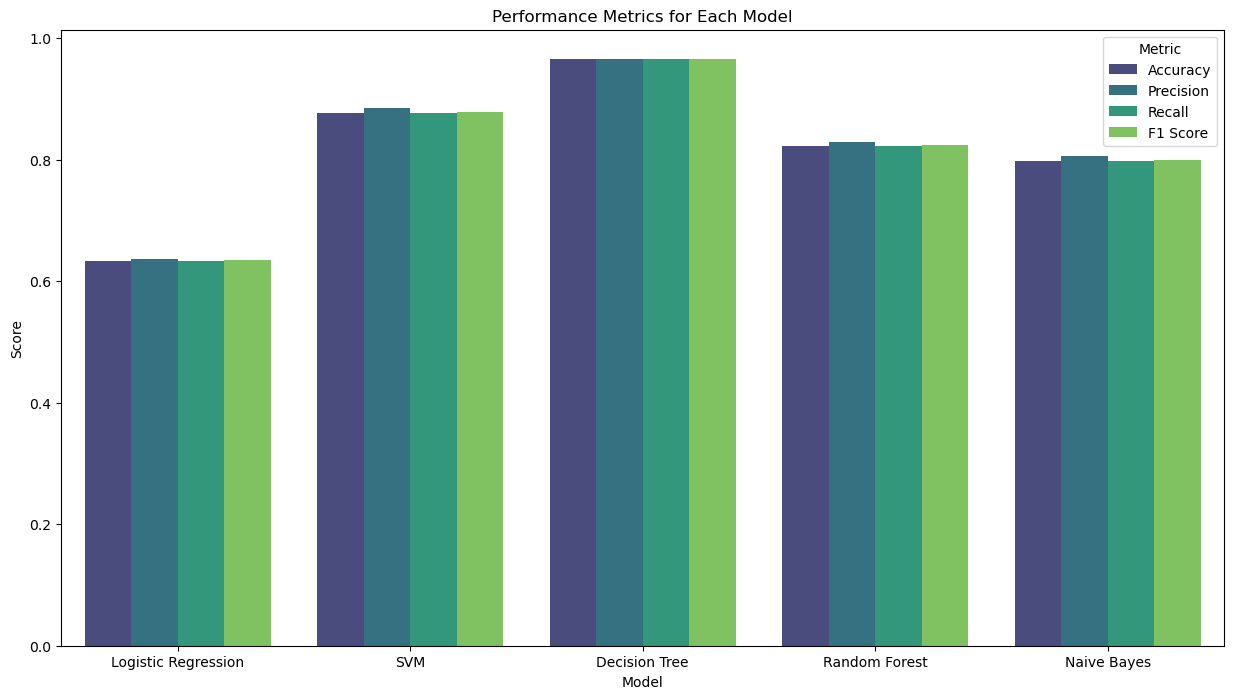

In [54]:
metrics_data = []
for idx, model in enumerate(model_pipeline):
    # Fit the model on training data
    model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')

    # Create a dictionary to store metrics
    metrics_dict = {
        'Model': model_list[idx],
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Append metrics to the list
    metrics_data.append(metrics_dict)

# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics_data)

# Plot bar graphs for all metrics
plt.figure(figsize=(15, 8))
metrics_long_df = pd.melt(metrics_df, id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_long_df, palette='viridis')
plt.title('Performance Metrics for Each Model')
plt.ylabel('Score')
plt.show()

### the perfomance of each model

In [56]:
model_list = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes']
metrics_data = []

for idx, model in enumerate(model_pipeline):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')

    metrics_dict = {
        'Model': model_list[idx],
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    metrics_data.append(metrics_dict)

metrics_df = pd.DataFrame(metrics_data)
markdown_table = metrics_df.to_markdown(index=False)

print(f"# Performance Report for Each Model:\n\n{markdown_table}\n")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Performance Report for Each Model:

| Model               |   Accuracy |   Precision |   Recall |   F1 Score |
|:--------------------|-----------:|------------:|---------:|-----------:|
| Logistic Regression |     0.6325 |    0.636749 |   0.6325 |   0.633962 |
| SVM                 |     0.8725 |    0.873033 |   0.8725 |   0.872693 |
| Decision Tree       |     0.965  |    0.965478 |   0.965  |   0.965036 |
| Random Forest       |     0.8225 |    0.825484 |   0.8225 |   0.822846 |
| Naive Bayes         |     0.7975 |    0.806132 |   0.7975 |   0.799422 |



## the best perfomance model

In [57]:
# Find the best-performing model based on accuracy
best_model = metrics_df.loc[metrics_df['Accuracy'].idxmax()]
print (best_model)

Model        Decision Tree
Accuracy             0.965
Precision         0.965478
Recall               0.965
F1 Score          0.965036
Name: 2, dtype: object
